In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical 
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, RandomRotation, RandomContrast, RandomBrightness
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

import tensorflow as tf

2023-05-26 04:27:40.812729: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-05-26 04:27:42.102956: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-26 04:27:42.107669: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-26 04:27:42.109193: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Definitions

In [3]:
WIDTH, HEIGHT = IMAGE_SIZE = (256, 256)
DEPTH = 3
DATASET_PATH = "dataset"
EPOCS = 500

# Data Preprocessing

### Preprocessing the Training set

In [4]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                       horizontal_flip = True,
                                       vertical_flip = True,
                                       width_shift_range = 0.1,
                                       height_shift_range = 0.1,
                                       rotation_range = 90,
                                       validation_split = 0.3,
                                       brightness_range=[0.3, 0.8])

training_set = training_datagen.flow_from_directory(DATASET_PATH,
                                                     target_size=IMAGE_SIZE,
                                                     batch_size=32,
                                                     seed=11,
                                                     class_mode = 'sparse',
                                                     subset = "training")
test_set = training_datagen.flow_from_directory(DATASET_PATH,
                                                     target_size=IMAGE_SIZE,
                                                     batch_size=32,
                                                     seed=11,
                                                     class_mode = 'sparse',
                                                     subset = "validation")

Found 226 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [5]:
class_indices = training_set.class_indices
num_classes = len(class_indices)
train_labels = training_set.classes
train_labels = to_categorical(train_labels, num_classes=len(class_indices))
class_indices

{'9V': 0, 'AA': 1, 'AAA': 2, 'D': 3, 'Unknown': 4}

# Building the CNN


In [6]:
model = Sequential()
model.add(RandomRotation(0.1))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(HEIGHT, WIDTH, DEPTH)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes))

2023-05-26 04:27:42.195552: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-26 04:27:42.205759: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-26 04:27:42.213297: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Part 3 - Training the CNN

### Compiling the CNN

### Training the CNN on the Training set and evaluating it on the Test set

In [8]:
history = model.fit(x = training_set, validation_data = test_set, epochs = EPOCS)

2023-05-26 04:27:43.694105: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


Epoch 1/500


2023-05-26 04:27:44.387397: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-26 04:27:44.939039: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-05-26 04:27:45.625418: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x3399adc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-26 04:27:45.625444: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2023-05-26 04:27:45.628430: I tensorflow/compiler/mlir/ten

8/8 [==============================] - ETA: 0s - loss: 2.6355 - accuracy: 0.2743

2023-05-26 04:27:49.012347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - 6s 447ms/step - loss: 2.6355 - accuracy: 0.2743 - val_loss: 1.5834 - val_accuracy: 0.2935
Epoch 2/500
8/8 [==============================] - 3s 393ms/step - loss: 1.5626 - accuracy: 0.2876 - val_loss: 1.5028 - val_accuracy: 0.2935
Epoch 3/500
8/8 [==============================] - 3s 383ms/step - loss: 1.5659 - accuracy: 0.2832 - val_loss: 1.5352 - val_accuracy: 0.2935
Epoch 4/500
8/8 [==============================] - 3s 389ms/step - loss: 1.5186 - accuracy: 0.2832 - val_loss: 1.4540 - val_accuracy: 0.2935
Epoch 5/500
8/8 [==============================] - 3s 386ms/step - loss: 1.4942 - accuracy: 0.2876 - val_loss: 1.4706 - val_accuracy: 0.2935
Epoch 6/500
8/8 [==============================] - 3s 380ms/step - loss: 1.4980 - accuracy: 0.2743 - val_loss: 1.4394 - val_accuracy: 0.2935
Epoch 7/500
8/8 [==============================] - 3s 386ms/step - loss: 1.4382 - accuracy: 0.2876 - val_loss: 1.4623 - val_accuracy: 0.2935
Epoch 8/500
8/8 [========

Epoch 59/500
8/8 [==============================] - 3s 384ms/step - loss: 0.4253 - accuracy: 0.8584 - val_loss: 0.4757 - val_accuracy: 0.8370
Epoch 60/500
8/8 [==============================] - 3s 390ms/step - loss: 0.4103 - accuracy: 0.8673 - val_loss: 0.4195 - val_accuracy: 0.8478
Epoch 61/500
8/8 [==============================] - 3s 369ms/step - loss: 0.3093 - accuracy: 0.8850 - val_loss: 0.5072 - val_accuracy: 0.7935
Epoch 62/500
8/8 [==============================] - 3s 376ms/step - loss: 0.3490 - accuracy: 0.8584 - val_loss: 0.7653 - val_accuracy: 0.6848
Epoch 63/500
8/8 [==============================] - 3s 379ms/step - loss: 0.5299 - accuracy: 0.7965 - val_loss: 0.4954 - val_accuracy: 0.7826
Epoch 64/500
8/8 [==============================] - 3s 380ms/step - loss: 0.3611 - accuracy: 0.8407 - val_loss: 0.5240 - val_accuracy: 0.7935
Epoch 65/500
8/8 [==============================] - 3s 424ms/step - loss: 0.4322 - accuracy: 0.8274 - val_loss: 0.6120 - val_accuracy: 0.8043
Epoch 

8/8 [==============================] - 3s 382ms/step - loss: 0.3579 - accuracy: 0.8761 - val_loss: 0.5200 - val_accuracy: 0.7500
Epoch 117/500
8/8 [==============================] - 3s 378ms/step - loss: 0.2620 - accuracy: 0.8805 - val_loss: 0.3355 - val_accuracy: 0.8478
Epoch 118/500
8/8 [==============================] - 3s 383ms/step - loss: 0.3244 - accuracy: 0.8761 - val_loss: 0.5584 - val_accuracy: 0.7174
Epoch 119/500
8/8 [==============================] - 3s 387ms/step - loss: 0.2951 - accuracy: 0.8717 - val_loss: 0.4018 - val_accuracy: 0.8152
Epoch 120/500
8/8 [==============================] - 3s 380ms/step - loss: 0.4407 - accuracy: 0.8407 - val_loss: 0.3818 - val_accuracy: 0.8696
Epoch 121/500
8/8 [==============================] - 3s 379ms/step - loss: 0.5076 - accuracy: 0.8274 - val_loss: 0.7769 - val_accuracy: 0.6413
Epoch 122/500
8/8 [==============================] - 3s 378ms/step - loss: 0.3939 - accuracy: 0.8363 - val_loss: 0.5118 - val_accuracy: 0.7609
Epoch 123/500

8/8 [==============================] - 3s 381ms/step - loss: 0.2166 - accuracy: 0.9115 - val_loss: 0.2938 - val_accuracy: 0.8696
Epoch 174/500
8/8 [==============================] - 3s 379ms/step - loss: 0.2430 - accuracy: 0.9159 - val_loss: 0.6780 - val_accuracy: 0.7174
Epoch 175/500
8/8 [==============================] - 3s 420ms/step - loss: 0.2826 - accuracy: 0.8894 - val_loss: 0.2926 - val_accuracy: 0.9022
Epoch 176/500
8/8 [==============================] - 3s 378ms/step - loss: 0.2365 - accuracy: 0.9159 - val_loss: 0.2779 - val_accuracy: 0.8913
Epoch 177/500
8/8 [==============================] - 3s 375ms/step - loss: 0.2696 - accuracy: 0.9115 - val_loss: 0.5289 - val_accuracy: 0.8152
Epoch 178/500
8/8 [==============================] - 3s 380ms/step - loss: 0.3087 - accuracy: 0.9071 - val_loss: 0.8508 - val_accuracy: 0.7391
Epoch 179/500
8/8 [==============================] - 3s 371ms/step - loss: 0.3375 - accuracy: 0.8673 - val_loss: 0.4751 - val_accuracy: 0.8261
Epoch 180/500

8/8 [==============================] - 3s 382ms/step - loss: 0.2128 - accuracy: 0.9204 - val_loss: 0.3349 - val_accuracy: 0.8587
Epoch 231/500
8/8 [==============================] - 3s 382ms/step - loss: 0.2756 - accuracy: 0.8894 - val_loss: 0.2684 - val_accuracy: 0.8804
Epoch 232/500
8/8 [==============================] - 3s 380ms/step - loss: 0.2934 - accuracy: 0.9027 - val_loss: 0.4250 - val_accuracy: 0.8587
Epoch 233/500
8/8 [==============================] - 3s 379ms/step - loss: 0.1829 - accuracy: 0.9115 - val_loss: 0.3293 - val_accuracy: 0.8587
Epoch 234/500
8/8 [==============================] - 3s 378ms/step - loss: 0.1603 - accuracy: 0.9469 - val_loss: 0.3846 - val_accuracy: 0.8478
Epoch 235/500
8/8 [==============================] - 3s 380ms/step - loss: 0.1936 - accuracy: 0.9336 - val_loss: 0.3556 - val_accuracy: 0.9022
Epoch 236/500
8/8 [==============================] - 3s 378ms/step - loss: 0.1274 - accuracy: 0.9425 - val_loss: 0.3679 - val_accuracy: 0.9022
Epoch 237/500

8/8 [==============================] - 3s 380ms/step - loss: 0.1951 - accuracy: 0.9292 - val_loss: 0.4129 - val_accuracy: 0.8261
Epoch 288/500
8/8 [==============================] - 3s 423ms/step - loss: 0.1303 - accuracy: 0.9469 - val_loss: 0.3569 - val_accuracy: 0.9130
Epoch 289/500
8/8 [==============================] - 3s 377ms/step - loss: 0.1454 - accuracy: 0.9425 - val_loss: 0.4736 - val_accuracy: 0.8478
Epoch 290/500
8/8 [==============================] - 3s 418ms/step - loss: 0.1418 - accuracy: 0.9469 - val_loss: 0.1923 - val_accuracy: 0.9022
Epoch 291/500
8/8 [==============================] - 3s 380ms/step - loss: 0.1092 - accuracy: 0.9513 - val_loss: 0.2106 - val_accuracy: 0.9130
Epoch 292/500
8/8 [==============================] - 3s 381ms/step - loss: 0.0882 - accuracy: 0.9646 - val_loss: 0.2162 - val_accuracy: 0.9022
Epoch 293/500
8/8 [==============================] - 3s 418ms/step - loss: 0.1125 - accuracy: 0.9381 - val_loss: 0.3424 - val_accuracy: 0.9130
Epoch 294/500

8/8 [==============================] - 3s 380ms/step - loss: 0.1359 - accuracy: 0.9381 - val_loss: 0.2396 - val_accuracy: 0.9022
Epoch 345/500
8/8 [==============================] - 3s 376ms/step - loss: 0.1574 - accuracy: 0.9558 - val_loss: 0.1472 - val_accuracy: 0.9565
Epoch 346/500
8/8 [==============================] - 3s 382ms/step - loss: 0.1753 - accuracy: 0.9425 - val_loss: 0.3631 - val_accuracy: 0.8913
Epoch 347/500
8/8 [==============================] - 3s 381ms/step - loss: 0.1310 - accuracy: 0.9513 - val_loss: 0.2353 - val_accuracy: 0.9239
Epoch 348/500
8/8 [==============================] - 3s 379ms/step - loss: 0.1481 - accuracy: 0.9381 - val_loss: 0.2797 - val_accuracy: 0.9348
Epoch 349/500
8/8 [==============================] - 3s 381ms/step - loss: 0.1710 - accuracy: 0.9381 - val_loss: 0.5809 - val_accuracy: 0.8152
Epoch 350/500
8/8 [==============================] - 3s 378ms/step - loss: 0.2185 - accuracy: 0.9071 - val_loss: 0.1933 - val_accuracy: 0.9457
Epoch 351/500

8/8 [==============================] - 3s 379ms/step - loss: 0.1571 - accuracy: 0.9381 - val_loss: 0.6778 - val_accuracy: 0.7500
Epoch 402/500
8/8 [==============================] - 3s 379ms/step - loss: 0.1331 - accuracy: 0.9292 - val_loss: 0.3352 - val_accuracy: 0.9239
Epoch 403/500
8/8 [==============================] - 3s 381ms/step - loss: 0.1367 - accuracy: 0.9513 - val_loss: 0.6385 - val_accuracy: 0.8587
Epoch 404/500
8/8 [==============================] - 3s 380ms/step - loss: 0.1342 - accuracy: 0.9336 - val_loss: 0.4603 - val_accuracy: 0.8261
Epoch 405/500
8/8 [==============================] - 3s 425ms/step - loss: 0.1027 - accuracy: 0.9513 - val_loss: 0.2686 - val_accuracy: 0.8804
Epoch 406/500
8/8 [==============================] - 3s 377ms/step - loss: 0.1636 - accuracy: 0.9336 - val_loss: 0.2056 - val_accuracy: 0.9130
Epoch 407/500
8/8 [==============================] - 3s 382ms/step - loss: 0.0864 - accuracy: 0.9646 - val_loss: 0.2559 - val_accuracy: 0.9130
Epoch 408/500

8/8 [==============================] - 3s 379ms/step - loss: 0.0824 - accuracy: 0.9558 - val_loss: 0.4058 - val_accuracy: 0.9348
Epoch 459/500
8/8 [==============================] - 3s 376ms/step - loss: 0.1160 - accuracy: 0.9469 - val_loss: 0.2867 - val_accuracy: 0.9457
Epoch 460/500
8/8 [==============================] - 3s 378ms/step - loss: 0.0659 - accuracy: 0.9735 - val_loss: 0.2730 - val_accuracy: 0.9239
Epoch 461/500
8/8 [==============================] - 3s 383ms/step - loss: 0.0730 - accuracy: 0.9690 - val_loss: 0.3289 - val_accuracy: 0.9239
Epoch 462/500
8/8 [==============================] - 3s 380ms/step - loss: 0.0833 - accuracy: 0.9735 - val_loss: 0.1296 - val_accuracy: 0.9239
Epoch 463/500
8/8 [==============================] - 3s 421ms/step - loss: 0.1070 - accuracy: 0.9469 - val_loss: 0.2240 - val_accuracy: 0.9239
Epoch 464/500
8/8 [==============================] - 3s 383ms/step - loss: 0.0968 - accuracy: 0.9646 - val_loss: 0.1854 - val_accuracy: 0.9130
Epoch 465/500

2023-05-26 04:53:01.564049: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 - 1s - loss: 0.2944 - accuracy: 0.9022 - 879ms/epoch - 293ms/step


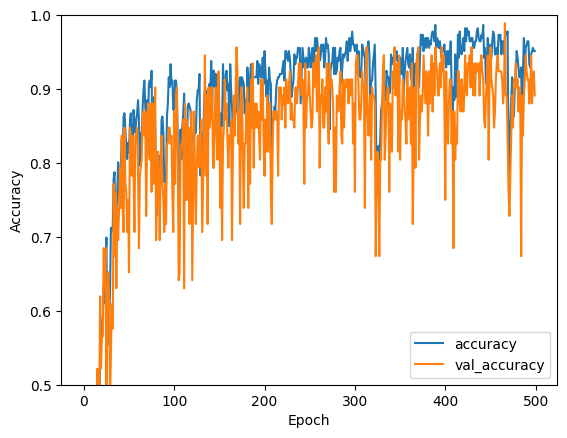

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_set, verbose=2)

In [10]:
print(test_acc)

0.9021739363670349


# Saving the model

In [11]:
MODEL = f'models/model_w{WIDTH}_acc{test_acc}_{datetime.now().isoformat()}'
model.save(MODEL)

2023-05-26 04:53:02.973626: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_rotation_input' with dtype float and shape [?,256,256,3]
	 [[{{node random_rotation_input}}]]
2023-05-26 04:53:03.036831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256,256,3]
	 [[{{node inputs}}]]
2023-05-26 04:53:03.052810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_rotation_input' with dtype float

INFO:tensorflow:Assets written to: models/model_w256_acc0.9021739363670349_2023-05-26T04:53:02.867874/assets


INFO:tensorflow:Assets written to: models/model_w256_acc0.9021739363670349_2023-05-26T04:53:02.867874/assets


## Converting to TF Lite

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [13]:
tfmodel = converter.convert()

2023-05-26 04:53:04.008431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_rotation_input' with dtype float and shape [?,256,256,3]
	 [[{{node random_rotation_input}}]]
2023-05-26 04:53:04.073748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256,256,3]
	 [[{{node inputs}}]]
2023-05-26 04:53:04.092529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_rotation_input' with dtype float

INFO:tensorflow:Assets written to: /tmp/tmps95_11zn/assets


INFO:tensorflow:Assets written to: /tmp/tmps95_11zn/assets
2023-05-26 04:53:05.442714: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-05-26 04:53:05.442745: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-05-26 04:53:05.443010: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmps95_11zn
2023-05-26 04:53:05.444323: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-05-26 04:53:05.444333: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmps95_11zn
2023-05-26 04:53:05.449944: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-05-26 04:53:05.451094: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-05-26 04:53:05.528065: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

In [14]:
f = tf.io.gfile.GFile(f'{MODEL}.tflite', 'wb')
f.write(tfmodel)
f.close()

In [15]:
f'{MODEL}.tflite'

'models/model_w256_acc0.9021739363670349_2023-05-26T04:53:02.867874.tflite'